<a href="https://colab.research.google.com/github/JoeArmel/JoeArmel/blob/main/Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!head gdrive/MyDrive/fcc-forum-pageviews.csv

date,value
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
2016-05-14,3127
2016-05-15,2927
2016-05-16,2591
2016-05-17,3403


In [ ]:
df = pd.read_csv("gdrive/MyDrive/fcc-forum-pageviews.csv", index_col = "date", parse_dates=[0] )
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [ ]:
df = df.loc[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [ ]:
def draw_line_plot():
  fig, ax = plt.subplots(figsize=(18, 6))

  # Add x-axis and y-axis
  ax.plot(df,
          color='red')

  # Set title and labels for axes
  ax.set(xlabel = 'Date',
         ylabel = 'Page Views',
         title = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019');

  fig.save('gdrive/MyDrive/line_plot.png')

  return fig


In [ ]:
df1 = df.copy()
df1['year'] = df1.index.year
df1['month'] = df1.index.month
df1.head()

,value,year,month
date,,,
2016-05-19,19736,2016,5
2016-05-26,18060,2016,5
2016-05-27,19997,2016,5
2016-05-28,19044,2016,5
2016-05-29,20325,2016,5


In [ ]:
x = df1.groupby(['year', 'month'])['value'].mean()


In [ ]:
x.sort_index(level=[0,1])

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

In [ ]:
dfx = x.unstack().sort_index()
dfx.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [ ]:
dfx.rename(columns={ 1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10 :'October', 11:'November', 12:'December'}, inplace=True)


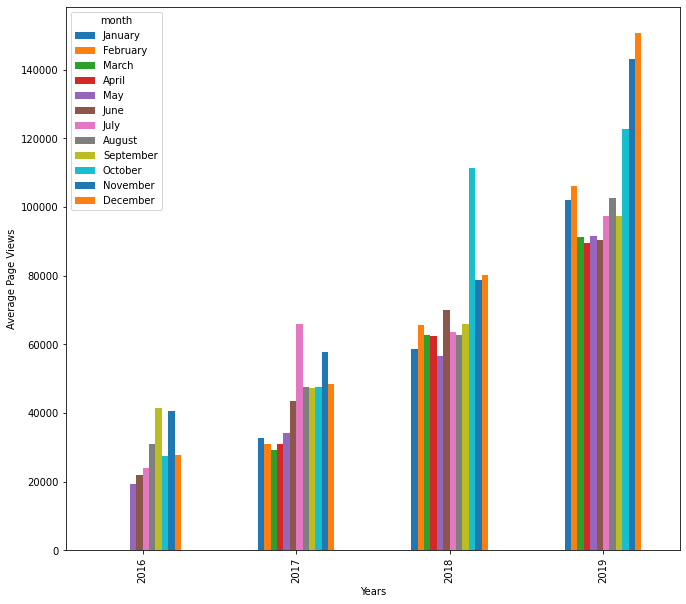

In [ ]:
#fig = plt.figure()
#ax = fig.add_subplot(1, 1, 1)
g = dfx.plot(kind = 'bar', figsize=(11, 10))
g.set(xlabel = 'Years',
       ylabel = 'Average Page Views')

fig = g.figure;

fig.savefig('gdrive/MyDrive/bar_plot.png')

In [ ]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


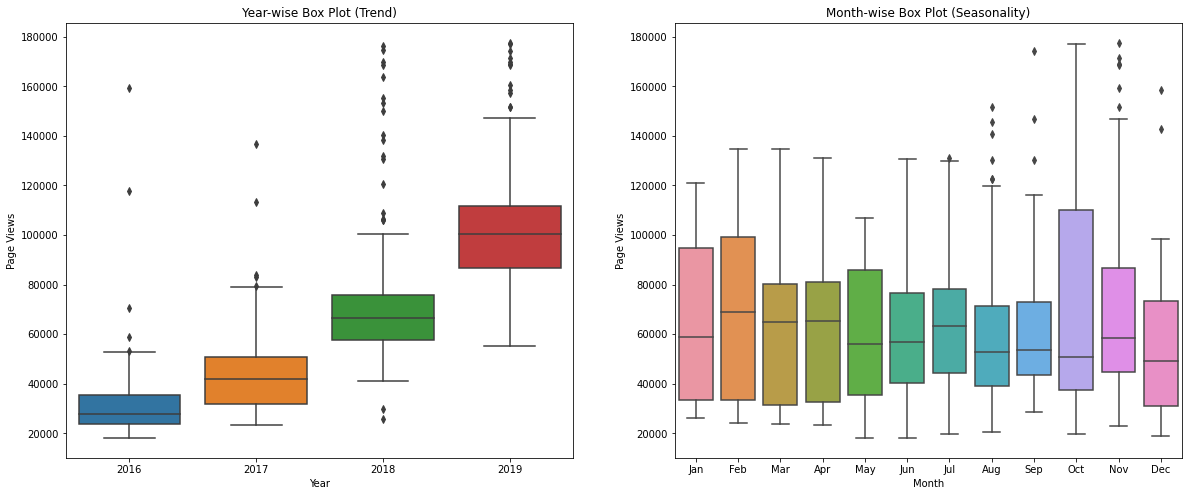

In [ ]:
fig = plt.figure(figsize=(20,8))

ax1 = fig.add_subplot(1, 2, 1)
sns.boxplot(x='year', y='value', data=df_box)
ax1.set_xlabel("Year")
ax1.set_ylabel("Page Views")
ax1.set_title("Year-wise Box Plot (Trend)")

ax2 = fig.add_subplot(1, 2, 2)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month',  y= 'value', data=df_box, ax=ax2, order=order)
ax2.set_xlabel("Month")
ax2.set_ylabel("Page Views")
ax2.set_title("Month-wise Box Plot (Seasonality)")


plt.show();

fig.savefig("gdrive/MyDrive/boxplot.png")

In [ ]:
dg=pd.DataFrame(np.random.randint(50,1000,365).reshape(-1,1),
                index=pd.date_range('2018-01-01','2018-12-31',freq='D'),
                columns=['sum'])
dg.reset_index(inplace=True)
dg.columns = ['Date','sum']
dg.head()

,Date,sum
0,2018-01-01,353
1,2018-01-02,243
2,2018-01-03,709
3,2018-01-04,76
4,2018-01-05,71


In [ ]:
dg['month'] = dg['Date'].dt.strftime('%b')
dg.head()

,Date,sum,month
0,2018-01-01,353,Jan
1,2018-01-02,243,Jan
2,2018-01-03,709,Jan
3,2018-01-04,76,Jan
4,2018-01-05,71,Jan


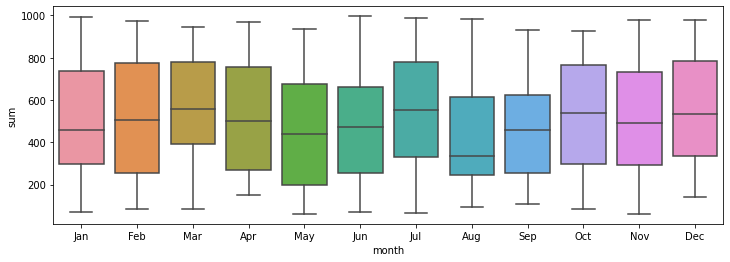

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches((12,4))
sns.boxplot(x='month',y='sum',data=dg,ax=ax)
plt.show()